# Homework06

Exercises to practice pandas, data analysis and regression

## Goals

- Understand the effects of pre-processing data
- Get familiar with the ML flow: encode -> normalize -> train -> evaluate
- Understand the difference between regression and classification tasks
- Build an intuition for different regression models

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this homework.

In [ ]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

from data_utils import object_from_json_url
from data_utils import StandardScaler
from data_utils import LinearRegression, SGDRegressor
from data_utils import regression_error

### Load Dataset

Let's load up the full [ANSUR](https://www.openlab.psu.edu/ansur2/) dataset that we looked at briefly in [Week 02](https://github.com/DM-GY-9103-2024F-H/WK02).

This is the dataset that has anthropometric information about U.S. Army personnel.

In [ ]:
# Load Dataset
ANSUR_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/ansur.json"
ansur_data = object_from_json_url(ANSUR_FILE)

# Look at first 2 records
ansur_data[:2]

#### Nested data

This is that *nested* dataset from Week 02.

# 🤔

Let's load it into a `DataFrame` to see what happens.

In [ ]:
# Read into DataFrame
ansur_df = pd.DataFrame.from_records(ansur_data)
ansur_df.head()


# 😓🙄

That didn't work too well. We ended up with objects in our columns.

Luckily, our `DataFrame` library has a function called [`json_normalize()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) that can help.

In [ ]:
# Read into DataFrame
ansur_df = pd.json_normalize(ansur_data)
ansur_df.head()

Much better. `DataFrames` are magic.

#### Data Exploration

Before we start creating models, let's do a little bit of data analysis and get a feeling for the shapes, distributions and relationships of our data.

1. Print `min`, `max` and `average` values for all of the features.
2. Print `covariance` tables for `age`, `ear.length` and `head.circumference`.
3. Plot `age`, `ear.length` and `head.circumference` versus the $1$ *feature* that is most correlated to each of them.

Don't forget to *encode* and *normalize* the data.

In [ ]:
# Work on Data Exploration here

### Encode non-numerical features
gender = ansur_df["gender"].unique()
print(gender)
gender_order = ["M", "F"]
#Male = 0 and Female = 1 

#here I specified data type to have an integer not a decimal, which is returned by defualt and not ideal for a category 
#Thanks to ChatGpt reviewing my code 
ansur_encoder = OrdinalEncoder(categories=[gender_order], dtype=int)
print(ansur_encoder)


ansur_df["gender"] = ansur_encoder.fit_transform(ansur_df[["gender"]])


In [ ]:
ansur_df.head()
## 1. Print min, max, avg
for feature in ansur_df:
    print(feature)
    print("\t min:", ansur_df[feature].min())
    print("\t max", ansur_df[feature].max())
    print("\t average", ansur_df[feature].mean())

### Normalize all data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(ansur_df)

## 2. Print Covariances
df_scaled.cov()

## 3. Plot features most correlated to age, ear length and head circumference
#Age Length most correlated variables
top_age = df_scaled.cov()["age"].sort_values(ascending=False)
plt.scatter(ansur_df["ear.length"], ansur_df["age"])
plt.xlabel("Ear Length")
plt.ylabel("Age")
plt.show()

plt.scatter(ansur_df["weight"], ansur_df["age"])
plt.xlabel("weight")
plt.ylabel("Age")
plt.show()

#Ear Length most correlated variables
top_ear_length = df_scaled.cov()["ear.length"].sort_values(ascending=False)

plt.scatter(ansur_df["weight"], ansur_df["ear.length"])
plt.xlabel("Weight")
plt.ylabel("Ear Length")
plt.show()

plt.scatter(ansur_df["hand.breadth"], ansur_df["ear.length"])
plt.xlabel("Hand Breadth")
plt.ylabel("Ear Langth")
plt.show()

#Head Circumfernce Length most correlated variables
top_head_cirumference = df_scaled.cov()["head.circumference"].sort_values(ascending=False)
plt.scatter(ansur_df["head.height"], ansur_df["head.circumference"])
plt.xlabel("Head Height")
plt.ylabel("Head Circumference")
plt.show()

plt.scatter(ansur_df["weight"], ansur_df["head.circumference"])
plt.xlabel("Weight")
plt.ylabel("Head Circumference")
plt.show()

In [ ]:
top_head_cirumference = df_scaled.cov()["head.circumference"].sort_values(ascending=False)
top_head_cirumference

### Interpretation

<span style="color:hotpink;">
Does anything stand out about these graphs? Or the correlations?<br>
Are correlations symmetric? Does the feature most correlated to ear length also have ear length as its most correlated pair?
</span>

<span style="color:lightgreen;">
- The most thing that stood out was the Head Circumference and it's correlation with positiv relationship with Weigth and Head Height.
<br>
- An interessting thing was in the Age and Ear Length graph. Ears length appears to vary very much through age. 
<br>
- The correlations seems to be symetric between the variables.
<br>
- According to the numbers it's not showing the same pairs as the most correlated
</span>

### Regression

Now, we want to create a regression model to predict `head.circumference` from the data.

From our [Week 06](https://github.com/PSAM-5020-2025S-A/WK06) notebook, we can create a regression model by following these steps:

1. Load dataset (done! 🎉)
2. Encode label features as numbers (done! ⚡️)
3. Normalize the data (done! 🍾)
4. Separate the outcome variable and the input features
5. Create a regression model using all features
6. Run model on training data and measure error
7. Plot predictions and interpret results
8. Run model on test data, measure error, plot predictions, interpret results

In [ ]:
# Work on Regression Model here

## Separate outcome variable and input features
dependent_variable = df_scaled["head.circumference"]
features = df_scaled.drop("head.circumference", axis=1)

## Create a regression model
model = LinearRegression()
model.fit(features, dependent_variable)
predicted_scaled = model.predict(features)
predicted = scaler.inverse_transform(predicted_scaled)

## Measure error on training data
regression_error(ansur_df["head.circumference"], predicted["head.circumference"])

## Plot predictions and interpret results
original_value = ansur_df["head.circumference"]
predicted_value = predicted["head.circumference"]

plt.plot(sorted(original_value), marker='o', linestyle='', alpha=0.3)
plt.plot(sorted(predicted_value), color='r', marker='o', markersize='3', linestyle='', alpha=0.1)
plt.ylabel("Head Circumference")
plt.xlabel("Predictions")
plt.show()


In [ ]:
## Load Test Data
ANSUR_TEST_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/ansur-test.json"

ansur_test_data = object_from_json_url(ANSUR_TEST_FILE)
ansur_test_df = pd.json_normalize(ansur_test_data)

ansur_test_encoded_df = ansur_test_df.copy()

g_vals = ansur_encoder.transform(ansur_test_df[["gender"]].values)
ansur_test_encoded_df[["gender"]] = g_vals

ansur_test_scaled_df = scaler.transform(ansur_test_encoded_df)



In [ ]:
## Run model on test data

# Work on Regression Model here

## Separate outcome variable and input features
test_dependent_variable = ansur_test_scaled_df["head.circumference"]
test_features = ansur_test_scaled_df.drop("head.circumference", axis=1)

## Create a regression model
test_model = LinearRegression()
test_model.fit(test_features, test_dependent_variable)
test_predicted_scaled = test_model.predict(test_features)
text_predicted = scaler.inverse_transform(test_predicted_scaled)

## Measure error on training data
regression_error(ansur_df["head.circumference"], predicted["head.circumference"])

## Plot predictions and interpret results

test_original_value = ansur_df["head.circumference"]
test_predicted_value = predicted["head.circumference"]

plt.plot(sorted(test_original_value), marker='o', linestyle='', alpha=0.3)
plt.plot(sorted(test_predicted_value), color='r', marker='o', markersize='3', linestyle='', alpha=0.1)
plt.ylabel("Head Circumference")
plt.xlabel("Predictions")
plt.show()


### Interpretation

<span style="color:hotpink;">
How well does your model perform?<br>
How could you improve it?<br>
Are there ranges of circumferences that don't get predicted well?
</span>

<span style="color:lightgreen;">
- The model does not seem to be very good. It has skwness on both sides. 
<br>
- However, its middle values predictions is acceptable. 
<br>
- We can apply PolynomiaFeatures object to create more features so we can improve the model. 
<br>
- Yes in about the lower < 100 and highers > 4100
</span>

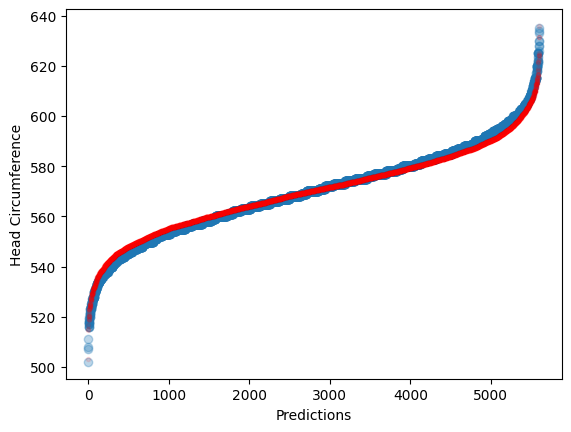

In [146]:
# Applying PloynomiaFeatures 
from data_utils import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias=False)

app_dependent_variable = df_scaled["head.circumference"]
app_features = df_scaled.drop("head.circumference", axis=1)
features_poly = poly.fit_transform(app_features)


## Create a regression model
app_model = LinearRegression()
app_model.fit(features_poly, app_dependent_variable)
app_predicted_scaled = app_model.predict(features_poly)
predicted = scaler.inverse_transform(app_predicted_scaled)

## Measure error on training data
regression_error(ansur_df["head.circumference"], predicted["head.circumference"])

## Plot predictions and interpret results
original_value = ansur_df["head.circumference"]
predicted_value = predicted["head.circumference"]

plt.plot(sorted(original_value), marker='o', linestyle='', alpha=0.3)
plt.plot(sorted(predicted_value), color='r', marker='o', markersize='3', linestyle='', alpha=0.1)
plt.ylabel("Head Circumference")
plt.xlabel("Predictions")
plt.show()


Even with a higher degree seems that the values on both ends are hard to predict. 
I am not sure. Maybe I have done something wrong. Or there is just not a enough information to predict Head Circumference